## Task 3: Clustering Analysis – Customer Segmentation

In [1]:
!pip install kaggle
!pip install kagglehub
!pip install matplotlib


In [2]:
import kagglehub
import os



### Load dataset from kaggle

In [3]:
# Download the dataset and store its path
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")


print("Path to dataset files:", path)


100%|██████████| 146k/146k [00:00<00:00, 45.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2


In [4]:
os.listdir(path)

['shopping_trends_updated.csv', 'shopping_trends.csv']

In [5]:
import pandas as pd

file_path = os.path.join(path, "shopping_trends_updated.csv")
df = pd.read_csv(file_path)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

### Step 2: Data Inspection

In [7]:
print(f"Dataset Shape: {df.shape}")
print("\nColumn Data Types:\n", df.dtypes)


Dataset Shape: (3900, 18)

Column Data Types:
 Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [8]:
#Check for missing values and duplicates
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())




Missing Values:
 Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Duplicate Rows: 0


In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### Step 3: Data Pre-Processing


In [10]:
#Drop unnecessary columns
columns_to_drop = [
     "Size", "Color", "Review Rating", "Subscription Status",
    "Shipping Type", "Discount Applied", "Promo Code Used"
]

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display the updated DataFrame
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Winter,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Winter,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Spring,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Spring,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Spring,31,PayPal,Annually


In [11]:
df.shape

(3900, 11)

## Standardize Data Using StandardScaler

In [12]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode Gender (Male = 0, Female = 1)
#label_encoder = LabelEncoder()
#df["Gender"] = label_encoder.fit_transform(df["Gender"])


label_encoders = {}
categorical_columns = ["Gender", "Item Purchased", "Category", "Payment Method", "Frequency of Purchases","Location", "Season"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Standardize numerical columns
scaler = StandardScaler()
numerical_columns = ["Age", "Purchase Amount (USD)", "Previous Purchases"]

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display processed data
print(df.head())



   Customer ID       Age  Gender  Item Purchased  Category  \
0            1  0.718913       1               2         1   
1            2 -1.648629       1              23         1   
2            3  0.390088       1              11         1   
3            4 -1.517099       1              14         2   
4            5  0.061263       1               2         1   

   Purchase Amount (USD)  Location  Season  Previous Purchases  \
0              -0.285629        16       3           -0.785831   
1               0.178852        18       3           -1.616552   
2               0.558882        20       1           -0.162789   
3               1.276716        38       1            1.637107   
4              -0.454531        36       1            0.391025   

   Payment Method  Frequency of Purchases  
0               5                       3  
1               1                       3  
2               2                       6  
3               4                       6  
4         

## Step 4: Clustering
### Determine Optimal Clusters (Elbow & Silhouette Method)


In [13]:
#Use the Elbow method to find optimal clusters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Elbow Method

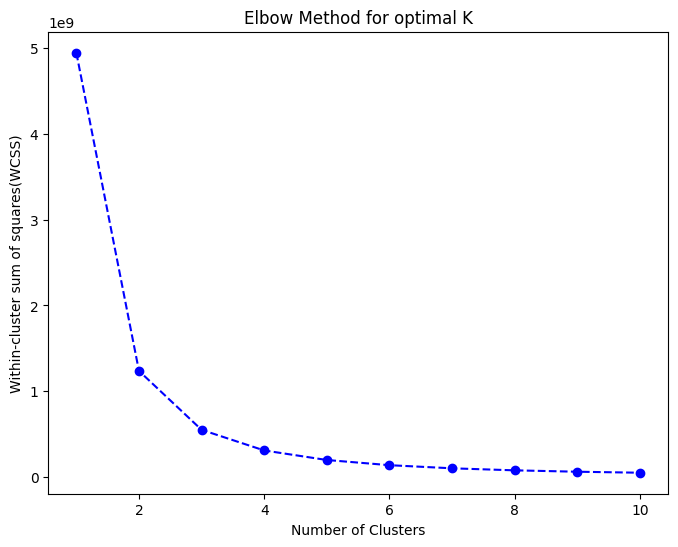

In [14]:
#Determine the optimal no of clusters using Elbow method
wcss = []   #Within-cluster sum of squares

for i in range(1, 11):  #test 1st 10 clusters
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

#Plot the Elbow method graph
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker = 'o', linestyle='--', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-cluster sum of squares(WCSS)")
plt.title("Elbow Method for optimal K")
plt.show()

### Silhouette Scores for evaluation

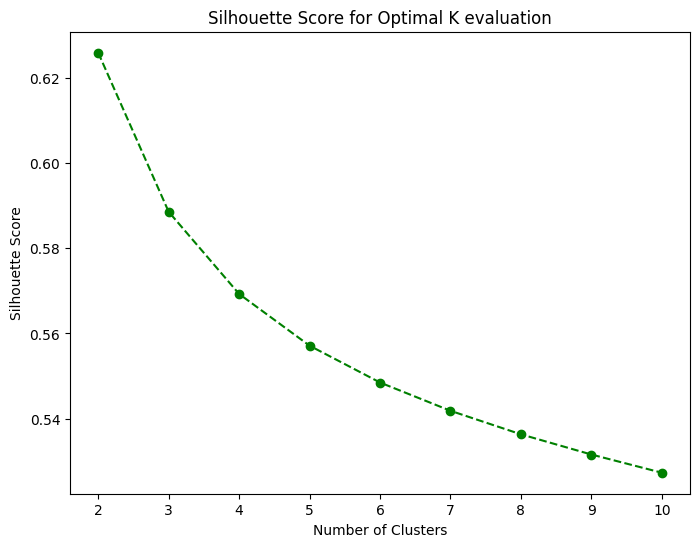

In [15]:
silhouette_scores = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  cluster_labels = kmeans.fit_predict(df)
  silhouette_scores.append(silhouette_score(df, cluster_labels))

#Plot Silhouette Score Graph
plt.figure(figsize=(8,6))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K evaluation")
plt.show()


### Apply K Means Clustering

In [16]:
#Choose k based on Elbow method
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df["Cluster"] = kmeans.fit_predict(df)

df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Previous Purchases,Payment Method,Frequency of Purchases,Cluster
0,1,0.718913,1,2,1,-0.285629,16,3,-0.785831,5,3,2
1,2,-1.648629,1,23,1,0.178852,18,3,-1.616552,1,3,2
2,3,0.390088,1,11,1,0.558882,20,1,-0.162789,2,6,2
3,4,-1.517099,1,14,2,1.276716,38,1,1.637107,4,6,2
4,5,0.061263,1,2,1,-0.454531,36,1,0.391025,4,0,2


### Principal Component Analysis (PCA)

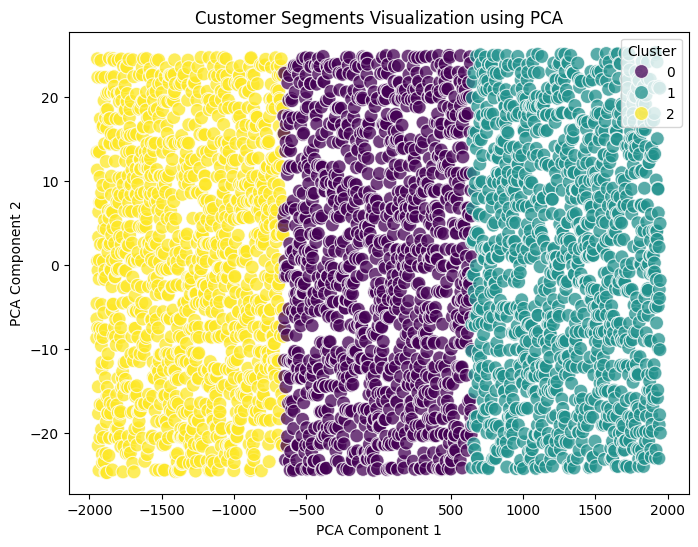

In [17]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['Cluster']))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["Cluster"], palette="viridis", s=100, alpha=0.75)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments Visualization using PCA")
plt.legend(title="Cluster")
plt.show()


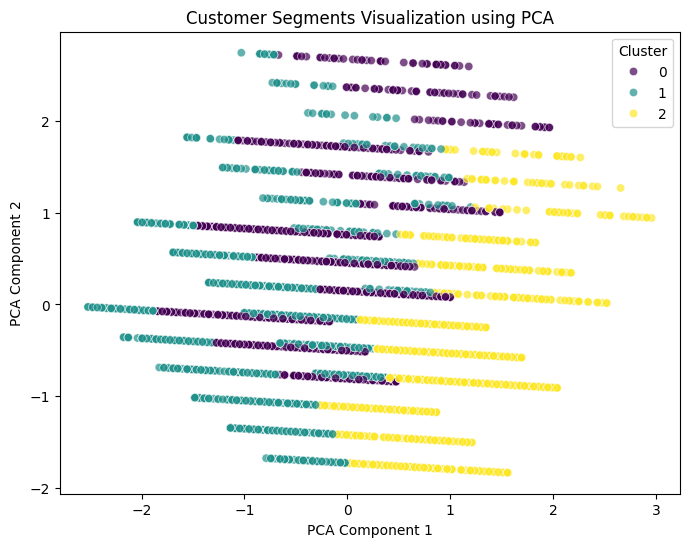

In [18]:
#PCA for specific categories
features = ['Age', 'Category','Payment Method']

# Encoding categorical variables
df['Category'] = df['Category'].astype('category').cat.codes
df['Payment Method'] = df['Payment Method'].astype('category').cat.codes

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plot PCA clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title("Customer Segments Visualization using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()



In [37]:
# Get the number of features used in clustering
cluster_centers = kmeans.cluster_centers_

num_features = cluster_centers.shape[1]

# Create a DataFrame with correct feature names
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:num_features])

print(cluster_centers_df)


   Customer ID       Age    Gender
0     0.549589  0.066393  0.943319
1    -1.055328 -0.111989 -0.073010
2     0.690736  0.064657 -0.921520


* Cluster 0 → Mostly Male, newer customers, likely a good target for male-focused promotions.

* Cluster 1 → Younger customers, balanced gender mix, could be good for youth-centric marketing.

* Cluster 2 → Mostly Female, newer customers, ideal for women-oriented product ads.

In [38]:
# Group by cluster and calculate mean values of features
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         Customer ID       Age    Gender  Item Purchased  Category  \
Cluster                                                              
0        1948.194969  0.549589  0.679245       12.111635  1.061321   
1        1925.262500 -1.055328  0.693056       11.963194  0.901389   
2        1983.558923  0.690736  0.664983       12.041246  1.059764   

         Purchase Amount (USD)   Location    Season  Previous Purchases  \
Cluster                                                                   
0                    -0.032541  24.194969  1.477987            0.031339   
1                     0.022178  23.988889  1.498611           -0.029239   
2                     0.007960  24.679293  1.501684            0.001886   

         Payment Method  Frequency of Purchases      PCA1      PCA2  
Cluster                                                              
0              4.106918                2.946541 -0.146579  0.555210  
1              2.388889                2.934028 -0.729615 -0.08

### Heatmap for Cluster Feature Averages

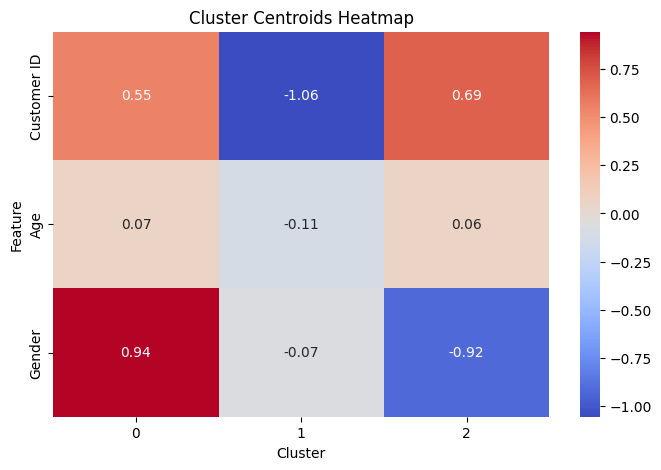

In [40]:
#Heatmap - Cluster Feature Averages (Centroid Visualization)
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_centers_df.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Cluster Centroids Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()

### Age, Category and Payment Method cluster

<ipython-input-20-0dbdb90c1a76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[feature], palette='viridis')
<ipython-input-20-0dbdb90c1a76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[feature], palette='viridis')
<ipython-input-20-0dbdb90c1a76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[feature], palette='viridis')


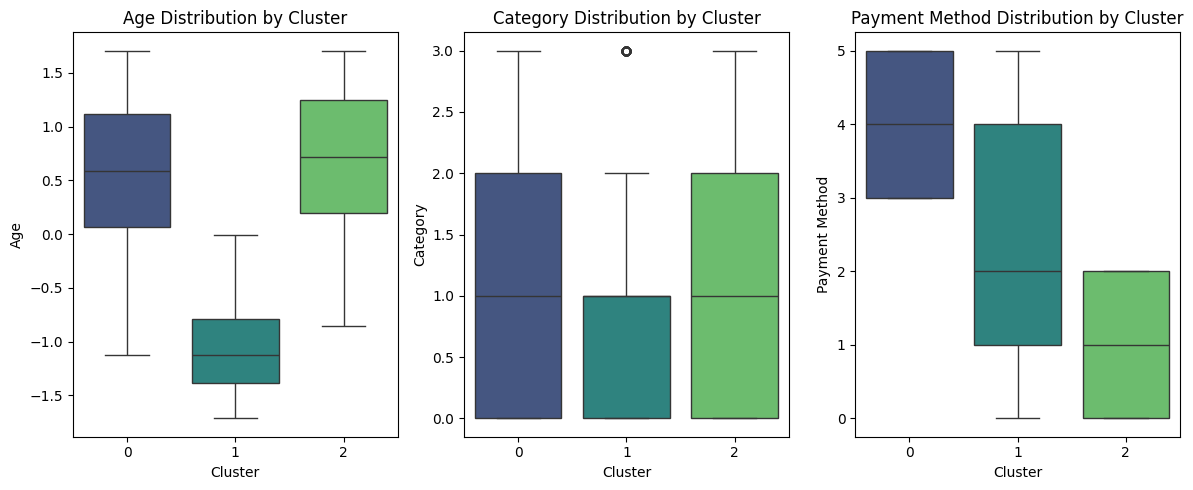

In [20]:
plt.figure(figsize=(12,5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df['Cluster'], y=df[feature], palette='viridis')
    plt.title(f'{feature} Distribution by Cluster')
plt.tight_layout()
plt.show()


### Cluster Distribution by Category & Payment method

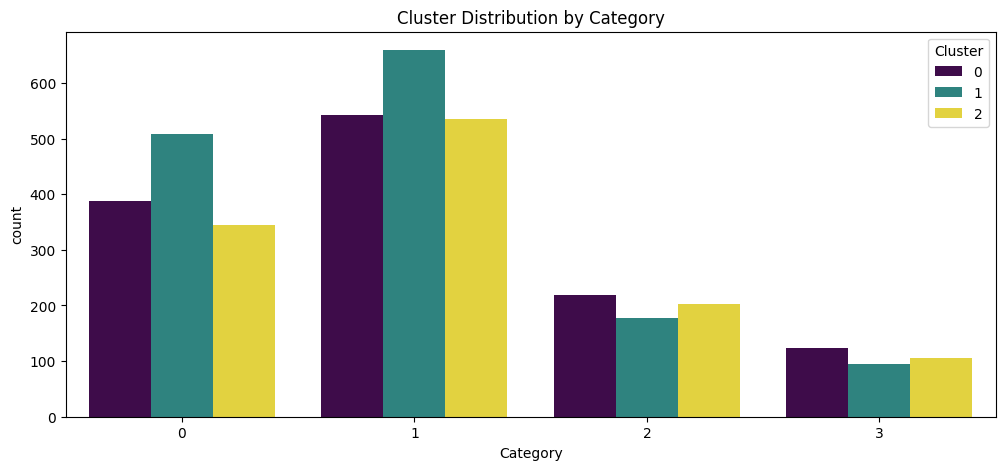

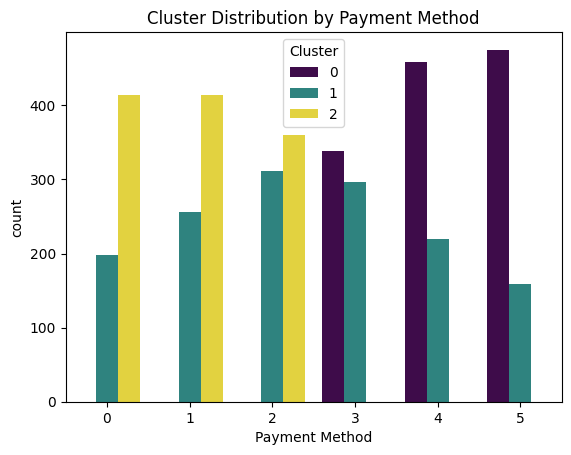

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x='Category', hue='Cluster', data=df, palette='viridis')
plt.title('Cluster Distribution by Category')
plt.show()

sns.countplot(x='Payment Method', hue='Cluster', data=df, palette='viridis')
plt.title('Cluster Distribution by Payment Method')
plt.show()


### Customer Purchase frequency by Cluster

<ipython-input-22-8f2a3e30f17e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['Frequency of Purchases'], palette='viridis')


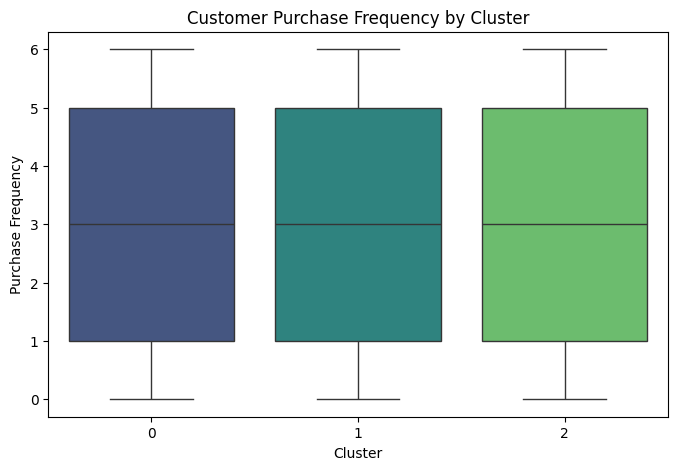

In [22]:
#Box plots to compare spending in each cluster
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Cluster'], y=df['Frequency of Purchases'], palette='viridis')
plt.title('Customer Purchase Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchase Frequency')
plt.show()


### Customer Age distribution by Cluster

<ipython-input-23-f7b426c5caf9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['Age'], palette='viridis')


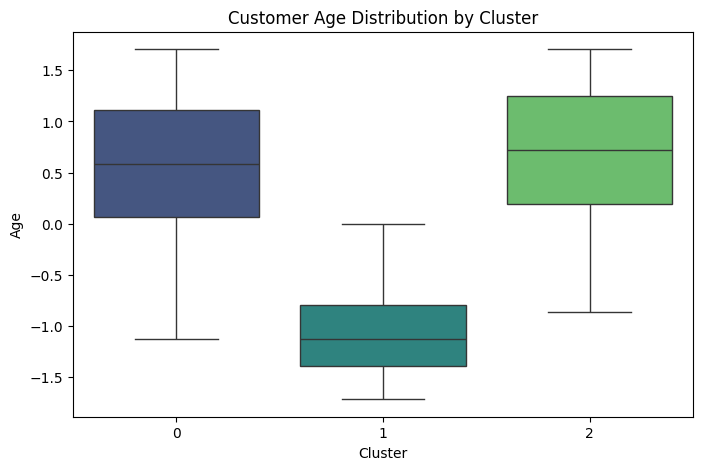

In [23]:
#Analyze Age Distribution for Each Cluster
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Cluster'], y=df['Age'], palette='viridis')
plt.title('Customer Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


#### Category of Puchase by each cluster

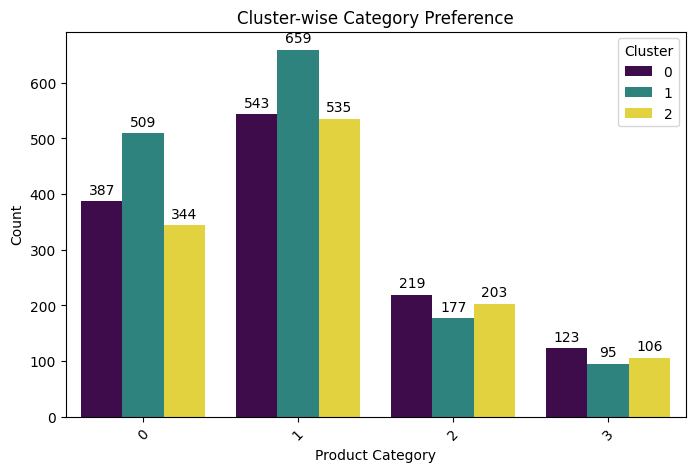

In [24]:
#Check Which Categories Are Popular in Each Cluster
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['Category'], hue=df['Cluster'], palette='viridis')

# Adding labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Cluster-wise Category Preference')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate category labels if needed
plt.show()


In [25]:
df.groupby('Cluster').mean()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Previous Purchases,Payment Method,Frequency of Purchases,PCA1,PCA2
Cluster,,,,,,,,,,,,,
0,1948.194969,0.549589,0.679245,12.111635,1.061321,-0.032541,24.194969,1.477987,0.031339,4.106918,2.946541,-0.146579,0.555210
1,1925.262500,-1.055328,0.693056,11.963194,0.901389,0.022178,23.988889,1.498611,-0.029239,2.388889,2.934028,-0.729615,-0.084554
2,1983.558923,0.690736,0.664983,12.041246,1.059764,0.007960,24.679293,1.501684,0.001886,0.954545,3.054714,1.041325,-0.491977


### Spending Frequency by Cluster

<ipython-input-26-43feed2d88f1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['Frequency of Purchases'], palette='viridis')


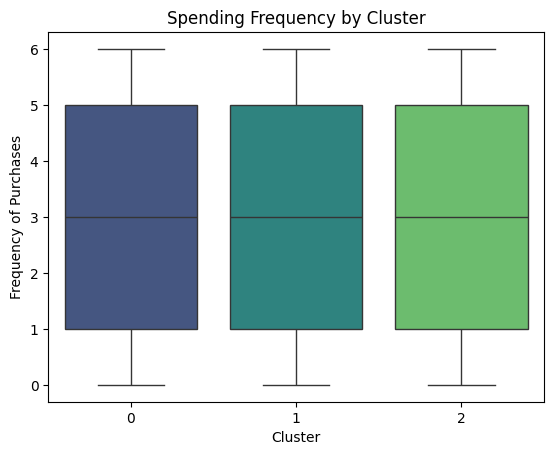

In [26]:
sns.boxplot(x=df['Cluster'], y=df['Frequency of Purchases'], palette='viridis')
plt.title('Spending Frequency by Cluster')
plt.show()
